In [359]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [360]:
cartoon = cv2.imread(r'C:\Users\pashu\OneDrive\Desktop\images\cartoon.bmp')
cartoon_y = cv2.imread(r'C:\Users\pashu\OneDrive\Desktop\images\cartoon_y.jpg')
girl = cv2.imread(r'C:\Users\pashu\OneDrive\Desktop\images\girl.png') #grayscale image
girl_y = cv2.imread(r'C:\Users\pashu\OneDrive\Desktop\images\girl_y.jpg')
fingerprint = cv2.imread(r'C:\Users\pashu\OneDrive\Desktop\images\fingerprint.jpg')
fingerprint_y = cv2.imread(r'C:\Users\pashu\OneDrive\Desktop\images\fingerprint_y.jpg')

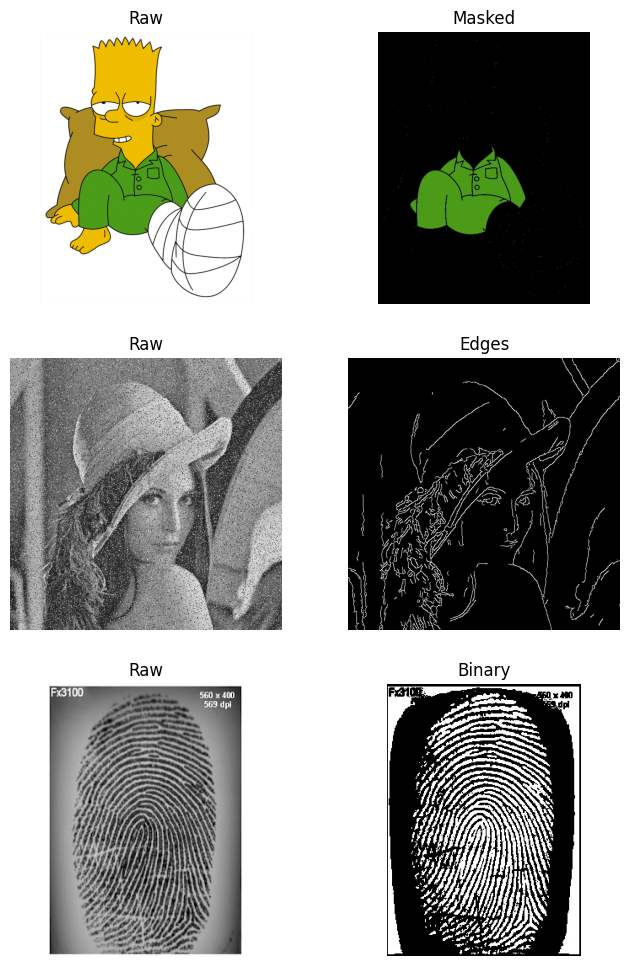

In [361]:
fig, axs = plt.subplots(3,2,figsize=(8,12))
axs[0,0].imshow(cv2.cvtColor(cartoon,cv2.COLOR_BGR2RGB))
axs[0,1].imshow(cartoon_y)
axs[0,0].axis("off")
axs[0,1].axis("off")
axs[0,0].set_title("Raw")
axs[0,1].set_title("Masked")
axs[1,0].imshow(girl)
axs[1,1].imshow(girl_y)
axs[1,0].axis("off")
axs[1,1].axis("off")
axs[1,0].set_title("Raw")
axs[1,1].set_title("Edges")
axs[2,0].imshow(cv2.cvtColor(fingerprint,cv2.COLOR_BGR2RGB))
axs[2,1].imshow(fingerprint_y)
axs[2,0].axis("off")
axs[2,1].axis("off")
axs[2,0].set_title("Raw")
axs[2,1].set_title("Binary")
plt.show()

In [362]:
hsvimage=cv2.cvtColor(cartoon,cv2.COLOR_BGR2HSV)
# print(cartoon)


In [363]:
def get_limit(color, rr):
    
    c = np.uint8([[color]])
    
    hsv = cv2.cvtColor(c, cv2.COLOR_BGR2HSV)
    
    lower_limit = (hsv[0][0][0] - rr, 50, 50)
    upper_limit = (hsv[0][0][0] + rr, 255, 255)
    
    
    lower_limit = np.array(lower_limit, dtype=np.uint8)
    upper_limit = np.array(upper_limit, dtype=np.uint8)
    
    return lower_limit, upper_limit

In [364]:
from PIL import Image

def get_image(hsvimage, rr):
    green=[0,255,0]
    mask = cv2.inRange(hsvimage,lower_limit,upper_limit)
    return mask


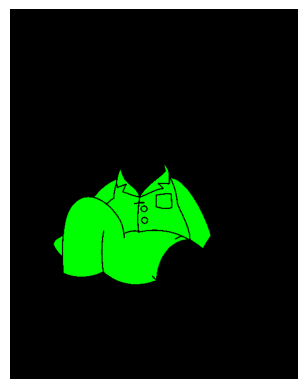

In [365]:

lower_green = np.array([35, 100, 100])
upper_green = np.array([85, 255, 255])

mask = cv2.inRange(hsvimage, lower_green, upper_green)
binary_mask = mask.copy()

binary_image = np.zeros((binary_mask.shape[0], binary_mask.shape[1], 3), dtype=np.uint8)
binary_image[binary_mask > 0] = [0, 255, 0]  # Green color


binary_pil_image = Image.fromarray(binary_image)
plt.imshow(binary_pil_image)
plt.axis('off')
plt.show()

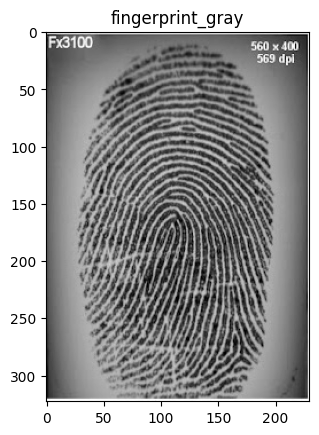

In [366]:
fingerprint_gray=cv2.cvtColor(fingerprint,cv2.COLOR_BGR2GRAY)
plt.imshow(fingerprint_gray,cmap='gray')
plt.title("fingerprint_gray")
plt.show()

In [367]:
ret,fingerprint_mentee=cv2.threshold(fingerprint_gray,105,255,cv2.THRESH_BINARY_INV)

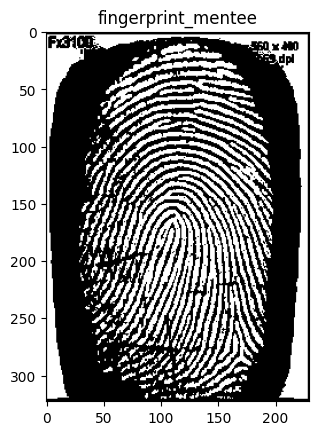

In [368]:
plt.imshow(fingerprint_mentee,cmap='gray')
plt.title("fingerprint_mentee")
plt.show()

girl_mentee=cv2.Canny(girl,100,200)

In [369]:
girl_blur=cv2.medianBlur(girl,5)


# Apply Canny edge detection
girl_mentee = cv2.Canny(girl_blur, 50, 200)


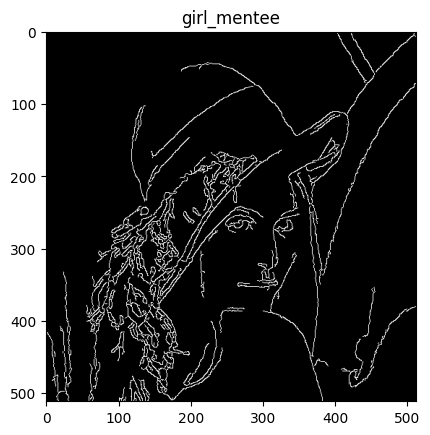

In [370]:
plt.imshow(girl_mentee,cmap='gray')
plt.title("girl_mentee")
plt.show()